# Python and Jupyter notebooks: part 02

Last revised: 04-Jun-2019 by Dick Furnstahl [furnstahl.1@osu.edu]

In this notebook we continue the tour of Python and Jupyter notebooks started in `TALENT_Jupyter_Python_intro_01.ipynb`.

## Aside: List comprehensions 

In the plotting examples in the next section we use for loops to iterate through parameters or plots because it is familiar to anyone who has done programming.  In Python, however, it is often preferred to use a different construction called a list comprehension.  Here is a quick comparison of using for loop and using a list comprehension, followed by some representative further examples of list comprehensions. You can find much more information and other examples in the online Python documentation and other sources. (The examples here are from [https://hackernoon.com/list-comprehension-in-python-8895a785550b].)

In [1]:
numbers = [1, 2, 3, 4]
squares = []

for n in numbers:
  squares.append(n**2)

print(squares)  # Output: [1, 4, 9, 16]

[1, 4, 9, 16]


In [2]:
numbers = [1, 2, 3, 4]
squares = [n**2 for n in numbers]

print(squares)  # Output: [1, 4, 9, 16]

[1, 4, 9, 16]


You can see how much cleaner the list comprehension is!

In [3]:
# Find common numbers from two lists using list comprehension
list_a = [1, 2, 3, 4]
list_b = [2, 3, 4, 5]

common_num = [a for a in list_a for b in list_b if a == b]

print(common_num) # Output: [2, 3, 4]

[2, 3, 4]


In [4]:
# Return numbers from the list which are not equal as a tuple:
list_a = [1, 2, 3]
list_b = [2, 7]

different_num = [(a, b) for a in list_a for b in list_b if a != b]

print(different_num) # Output: [(1, 2), (1, 7), (2, 7), (3, 2), (3, 7)]

[(1, 2), (1, 7), (2, 7), (3, 2), (3, 7)]


In [5]:
# Iterate over strings
list_a = ["Hello", "World", "In", "Python"]

small_list_a = [str.lower() for str in list_a]

print(small_list_a) # Output: ['hello', 'world', 'in', 'python']

['hello', 'world', 'in', 'python']


In [6]:
# Making a list of lists
list_a = [1, 2, 3]

square_cube_list = [ [a**2, a**3] for a in list_a]

print(square_cube_list) # Output: [[1, 1], [4, 8], [9, 27]]

[[1, 1], [4, 8], [9, 27]]


In [7]:
# Using an if statement to make a list of unequal pairs of numbers
[(x, y) for x in [1,2,3] for y in [3,1,4] if x != y]
   # Output: [(1, 3), (1, 4), (2, 3), (2, 1), (2, 4), (3, 1), (3, 4)]

[(1, 3), (1, 4), (2, 3), (2, 1), (2, 4), (3, 1), (3, 4)]

## Iterating through a list of parameters to draw multiple lines on a plot

Suppose we have a function of $x$ that also depends on a parameter (call it $r$).  We want to plot the function vs. $x$ for multiple values of $r$, either on the same plot or on separate plots.  We can do this with a lot of cutting-and-pasting, but how can we do it based on a list of $r$ values, which we can easily modify?

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot formatting

In [9]:
def sine_map(r, x):
    """Sine map function: f_r(x) = r sin(pi x)
    """
    return r * np.sin(np.pi * x) 

Suppose the $r$ values initially of interest are 0.3, 0.5, 0.8, and 0.9.  First the multiple copy approach:

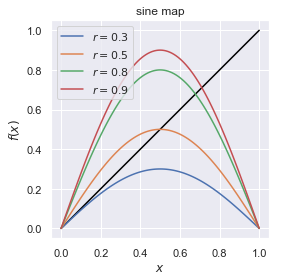

In [10]:
x_pts = np.linspace(0,1, num=101, endpoint=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

ax.plot(x_pts, x_pts, color='black')  # black y=x line

ax.plot(x_pts, sine_map(0.3, x_pts), label='$r = 0.3$')
ax.plot(x_pts, sine_map(0.5, x_pts), label='$r = 0.5$')
ax.plot(x_pts, sine_map(0.8, x_pts), label='$r = 0.8$')
ax.plot(x_pts, sine_map(0.9, x_pts), label='$r = 0.9$')

ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title('sine map')

fig.tight_layout()


This certainly works, but making changes is awkward and prone to error because we have to find where to change (or add another) $r$ but we might not remember to change it correctly everywhere.

With minor changes we have a much better implementation (try modifying the list of $r$ values):

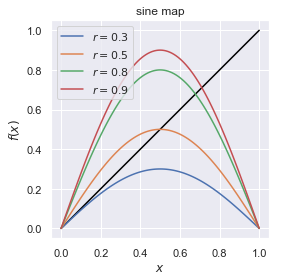

In [11]:
r_list = [0.3, 0.5, 0.8, 0.9]    # this could also be a numpy array

x_pts = np.linspace(0,1, num=101, endpoint=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

ax.plot(x_pts, x_pts, color='black')  # black y=x line

# Step through the list.  r is a dummy variable.
#  Note the use of an f-string and LaTeX by putting rf in front of the label.
for r in r_list:
    ax.plot(x_pts, sine_map(r, x_pts), label=rf'$r = {r:.1f}$')

ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title('sine map')

fig.tight_layout()


In [12]:
def plot_sine_map(r):
    x_pts = np.linspace(0,1, num=101, endpoint=True)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect(1)
    
    ax.plot(x_pts, x_pts, color='black')  # black y=x line
    
    # Step through the list.  r is a dummy variable.
    #  Note the use of an f-string and LaTeX by putting rf in front of the label.
    for r in r_list:
        ax.plot(x_pts, sine_map(r, x_pts), label=rf'$r = {r:.1f}$')
    
    ax.legend()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f(x)$')
    ax.set_title('sine map')
    
    fig.tight_layout()


Now suppose we want each the different $r$ values to be plotted on separate graphs?  We could make multiple  copies of the single plot.  Instead, lets make a function to do any single plot and call it for each $r$ in the list.

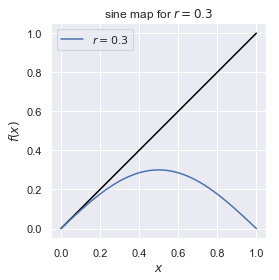

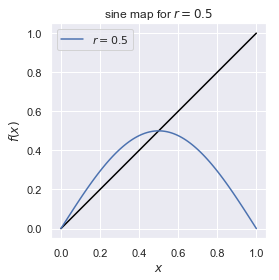

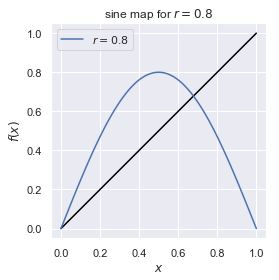

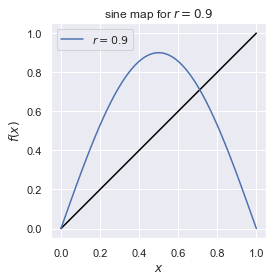

In [13]:
r_list = [0.3, 0.5, 0.8, 0.9]    # this could also be a numpy array

def plot_sine_map(r):
    x_pts = np.linspace(0,1, num=101, endpoint=True)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect(1)

    ax.plot(x_pts, x_pts, color='black')  # black y=x line

#  Note the use of an f-string and LaTeX by putting rf in front of the label.
    ax.plot(x_pts, sine_map(r, x_pts), label=rf'$r = {r:.1f}$')

    ax.legend()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f(x)$')
    ax.set_title(rf'sine map for $r = {r:.1f}$')
    
    fig.tight_layout()

    
# Step through the list.  r is a dummy variable.
for r in r_list:
    plot_sine_map(r)


What if instead of distinct plots we wanted subplots of the same figure?  Then create the figure and subplot axes outside of the function and have the function return the modified axis object.

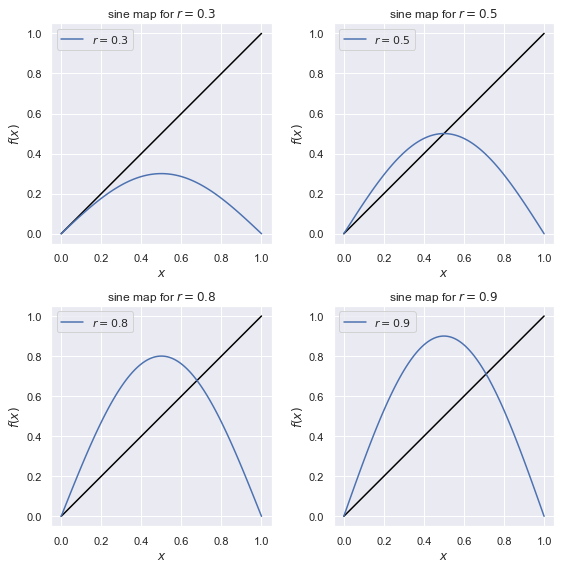

In [14]:
r_list = [0.3, 0.5, 0.8, 0.9]    # this could also be a numpy array

def plot_sine_map(r, ax_passed):
    x_pts = np.linspace(0,1, num=101, endpoint=True)

    ax_passed.set_aspect(1)

    ax_passed.plot(x_pts, x_pts, color='black')  # black y=x line

#  Note the use of an f-string and LaTeX by putting rf in front of the label.
    ax_passed.plot(x_pts, sine_map(r, x_pts), label=rf'$r = {r:.1f}$')

    ax_passed.legend()
    ax_passed.set_xlabel(r'$x$')
    ax_passed.set_ylabel(r'$f(x)$')
    ax_passed.set_title(rf'sine map for $r = {r:.1f}$')
    
    return ax_passed

fig = plt.figure(figsize=(8, 8))
  
# Step through the list.  r is a dummy variable.
rows = 2
cols = 2
for index, r in enumerate(r_list):
    ax = fig.add_subplot(rows, cols, index+1)
    ax = plot_sine_map(r, ax)

fig.tight_layout()
    